In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Exploratory Data Analysis

### 1. Understand the Structure of the Dataset

In [2]:
# Load the data
df = pd.read_csv('bank-full.csv', delimiter=';')

In [3]:
# Preview the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Data Types
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [5]:
# Shape
df.shape

(45211, 17)

### 2. Check for Missing Values

In [6]:
# Missing value count
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### 3. Data Summary

#### Identifying categorical and numerical features

In [7]:
# Categorical Features
categorical_features = df.select_dtypes(include='object').columns[:-1] # exclude target variable
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [8]:
# Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [9]:
# Identify discrete numerical features
discrete_features = [col for col in numerical_features if df[col].nunique() <= 25]
print('Discrete -', discrete_features)

# Identify continuous numerical features
continuous_features = [col for col in numerical_features if df[col].nunique() > 25]
print('Continuous - ', continuous_features)

Discrete - []
Continuous -  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [10]:
df.day.nunique()

31

In [11]:
np.array(sorted(df.day.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Since `day` has 31 unique values which represents the 31 days of a month, It can be taken as a discrete feature.

In [12]:
# Identify discrete numerical features
discrete_features = [col for col in numerical_features if df[col].nunique() <= 31]
print('Discrete -', discrete_features)

# Identify continuous numerical features
continuous_features = [col for col in numerical_features if df[col].nunique() > 31]
print('Continuous - ', continuous_features)

Discrete - ['day']
Continuous -  ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
for col in categorical_features:
    print(col)
    print(df[col].value_counts())
    print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

poutcome
unknown    36959
failure

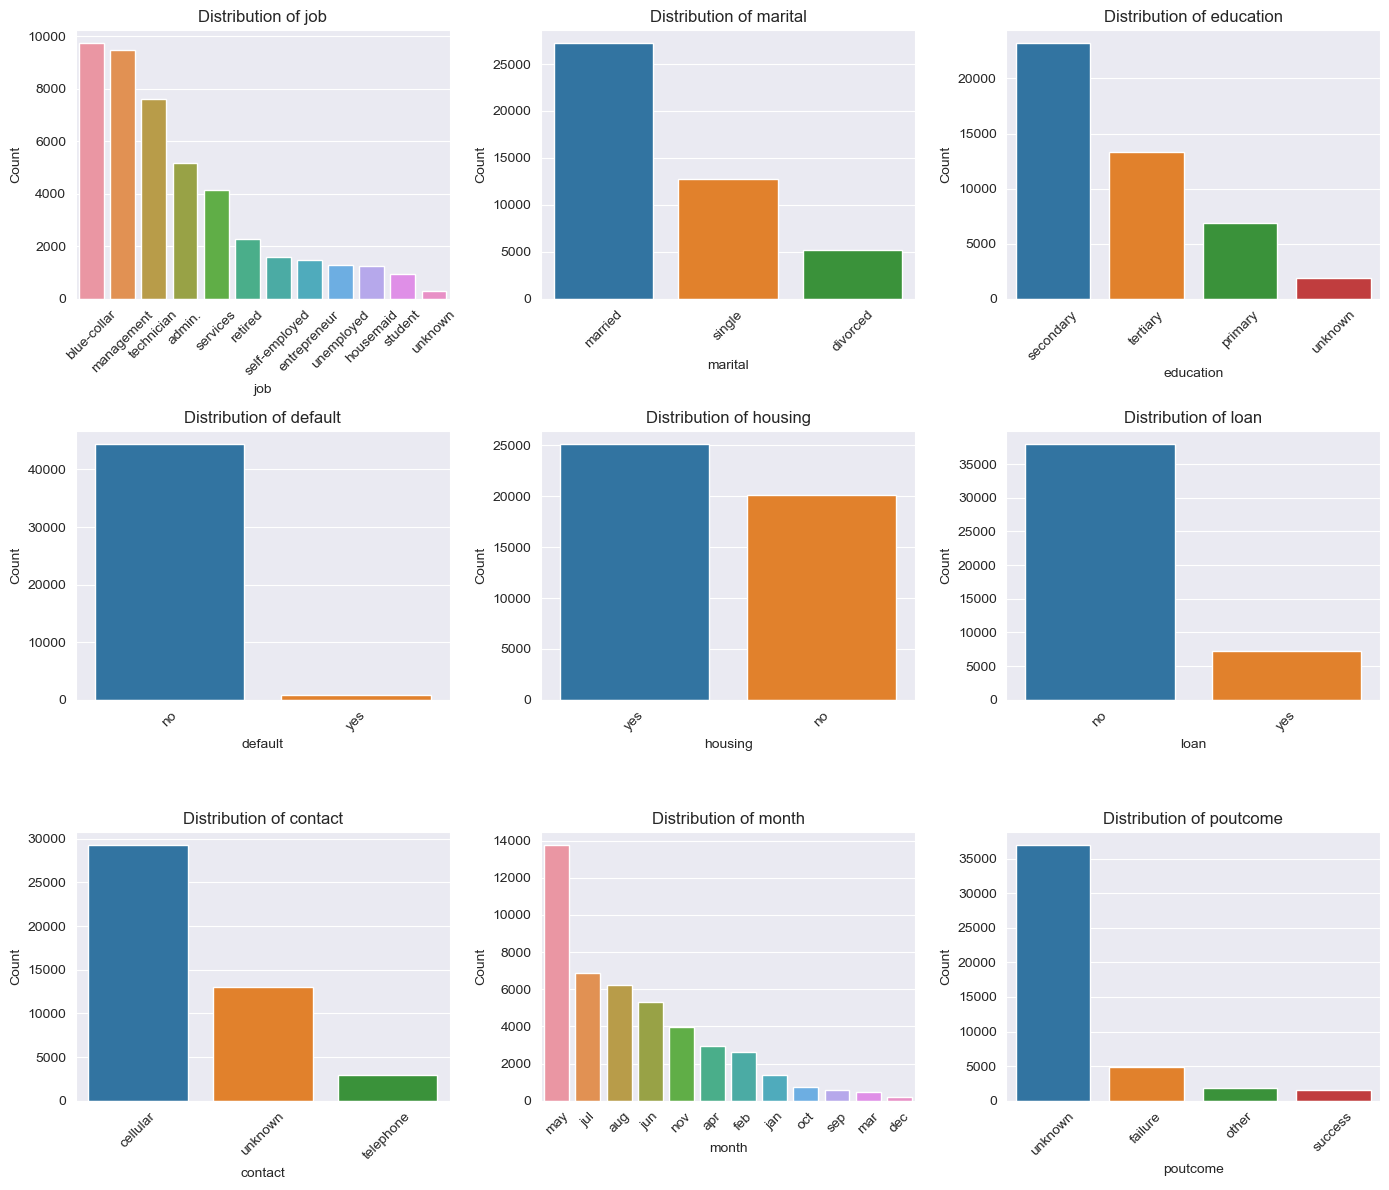

In [14]:
# Frequency Distribution - Categorical Features

# Create subplots: one row, multiple columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size based on 8 subplots
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each column in a subplot
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

**Key Insights from Categorical Features**

1. **Job**: Most people have "blue-collar" or "management" jobs, with a small number in "unknown" categories.
2. **Marital Status**: Most individuals are "married," with fewer "single" or "divorced."
3. **Education**: Most people have "secondary" education, followed by "tertiary" and fewer with "primary" education. Some data is "unknown."
4. **Default**: Most people have no credit defaults, suggesting they are financially stable. Due to the high imbalance of data in this feature, this can be dropped
5. **Housing**: Most individuals have a housing loan ("yes").
6. **Loan**: Similar to housing, most people don’t have a loan. This may indicate that most individuals in the dataset are not in debt.
7. **Contact**: Most communication is via "cellular" phones, with some "unknown" data. This information could be less affective to the target variable from the meaning.
8. **Month**: "May," "July," and "August" have the most data, while "March," "December," and "September" have fewer.
9. **Poutcome**: Most outcomes are "unknown," with a few labeled as "failure," "other," or "success." This suggests that previous campaigns had mixed results, with many individuals not responding or receiving an unclear outcome. Since most values here are unknown and could give the wrong insights to the model, this feature can also be dropped.


In [15]:
# Descriptive Statistics - summary of numerical data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Key Insights from Continuous Numerical features**

1. **Age**: Ranges from 18 to 95, with an average of 41 years.
2. **Balance**: Wide range from -8019 to 102,127; average is 1362, with many low balances.
3. **Day**: Values between 1 and 31, with an average of 15.8.
4. **Duration**: Ranges from 0 to 4918 seconds, average of 258 seconds.
5. **Campaign**: Ranges from 1 to 63 contacts, average of 2.76.
6. **Pdays**: Most values are -1 (no previous contact), ranging up to 871.
7. **Previous**: Most people have 0 previous contacts, with an average of 0.58.

**Conclusion:**
- `balance` has some extreme outliers (negative and positive).
- Most people were contacted only once or twice, with many having no prior contact.

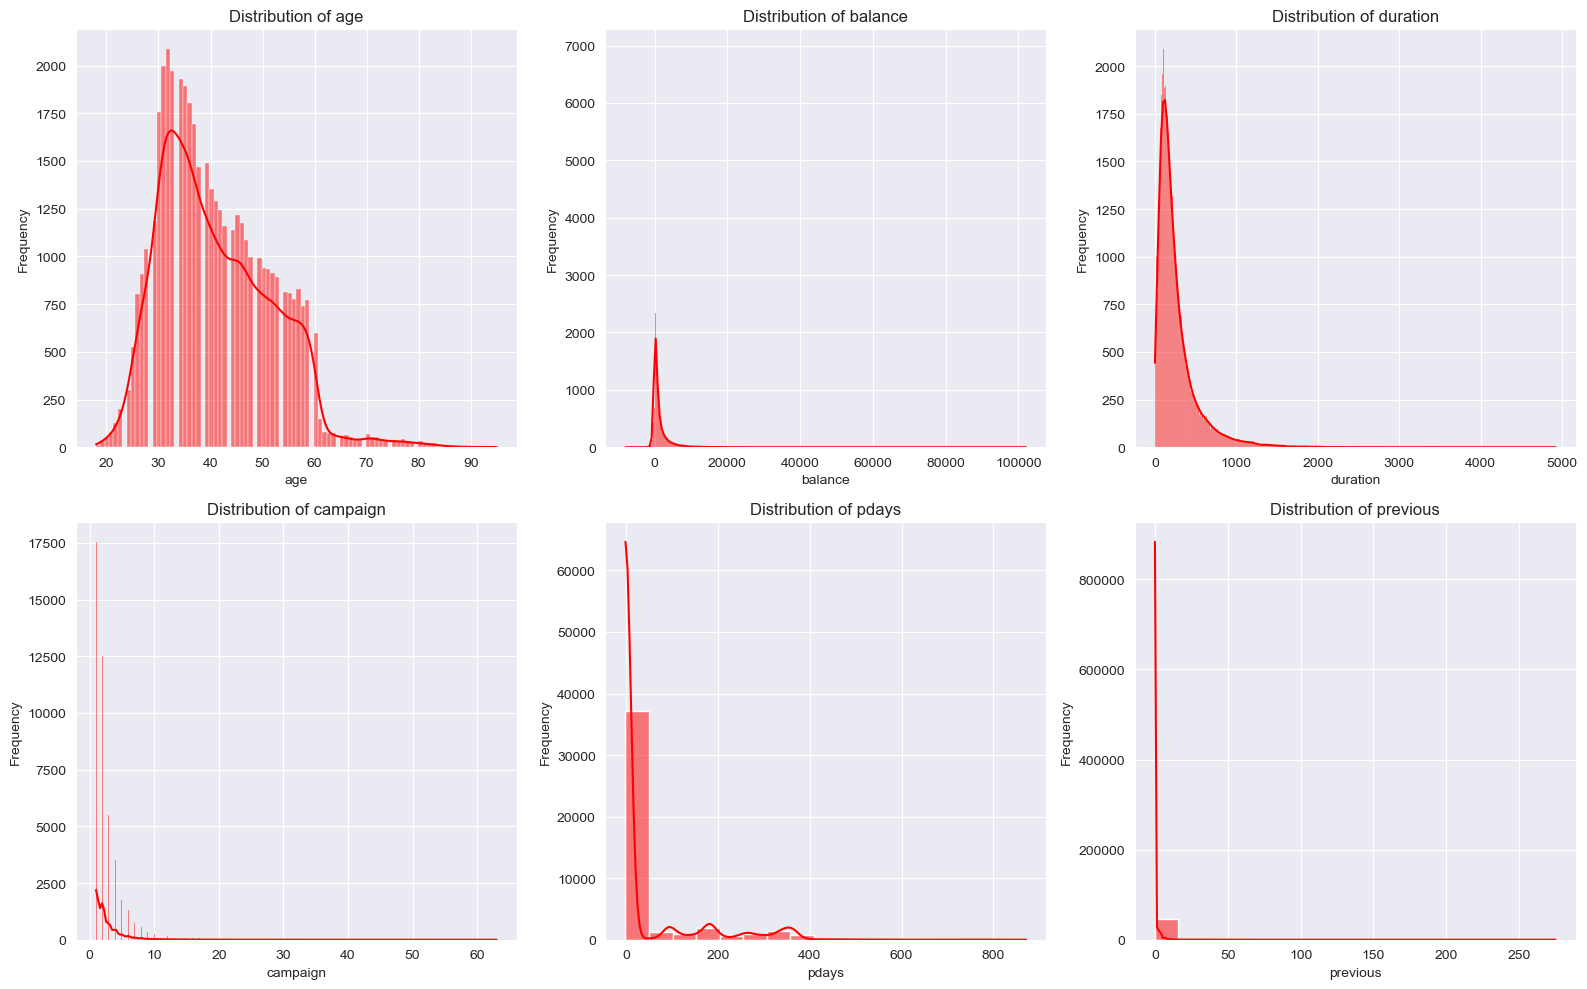

In [16]:
# Frequency Distributions

# Create subplots: 3 rows and 3 columns for 7 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))  # Adjust grid size
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each continuous column in a subplot
for i, col in enumerate(continuous_features):
    sns.histplot(data=df, x=col, color='red', kde=True, ax=axes[i])  # Use histogram with KDE
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Turn off unused axes (if any)
for j in range(len(continuous_features), len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

While `age` is distributed normally with a small skewness to the right, all the other features are very much right skewed.

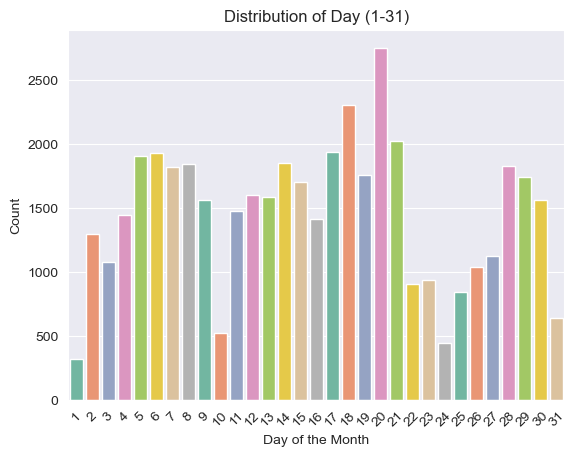

In [17]:
# Discrete Numerical feature - day

# Plotting the 'day' feature as a bar plot
plt.figure()
sns.countplot(x='day', data=df, palette='Set2')
plt.title('Distribution of Day (1-31)')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Skewness: Certain days (e.g., middle of the month) have higher counts than others, this could suggest that more interactions occur on those days, possibly due to specific business or user behavior patterns.


### 4. Identify Outliers

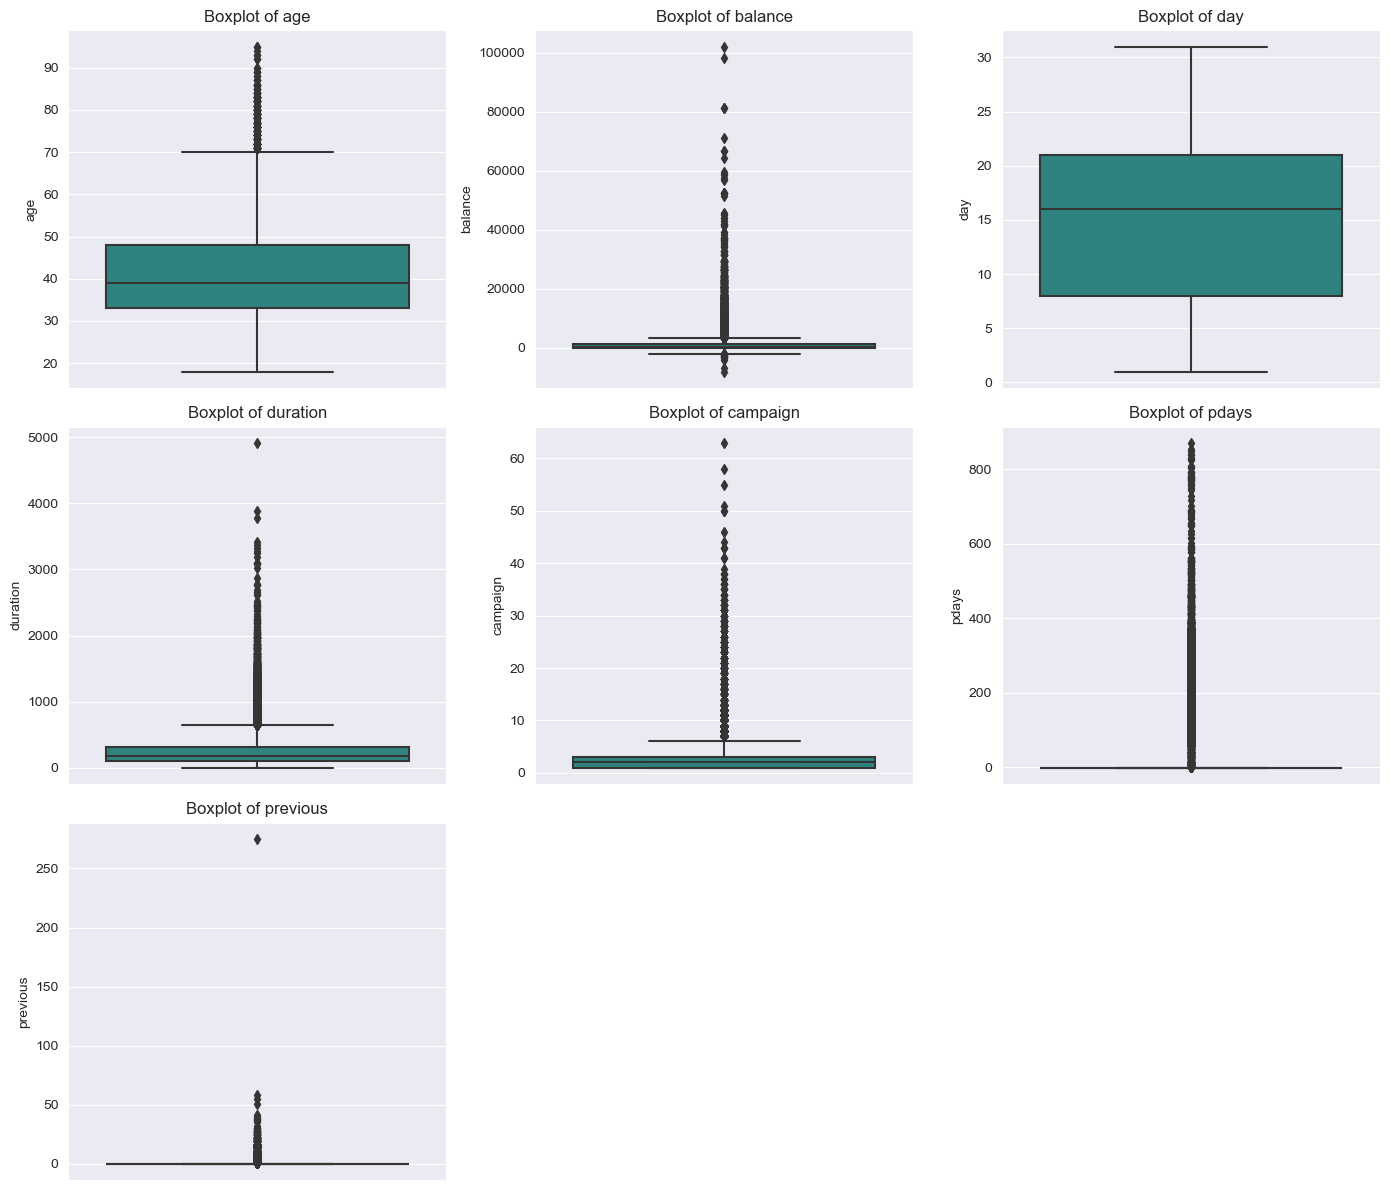

In [18]:
# Boxplot - Numerical Features

# Create subplots: Adjust rows and columns based on the number of features
n_features = len(numerical_features)
n_rows = (n_features + 2) // 3  # 3 columns per row
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(14, 4 * n_rows))  # Dynamic height
axes = axes.flatten()  # Flatten axes array to iterate easily

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, y=col, ax=axes[i], palette="viridis")  # Boxplot for each column
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Turn off unused axes (if any)
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


`day` does not have any outliers. All the other features have outliers. They should be further investigate.

### 5. Correlation Analysis

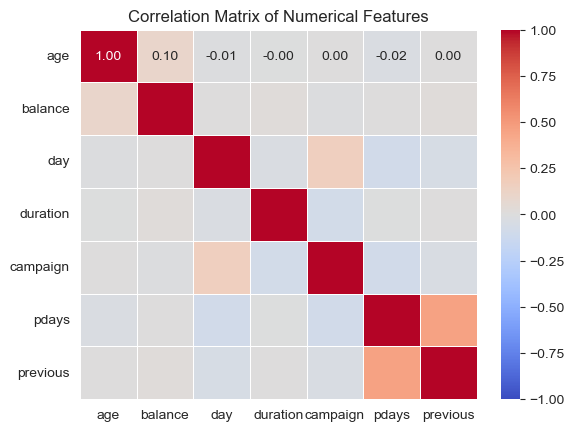

In [19]:
# Correlation Matrix - for continuous variables

correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

After calculating the correlation matrix for the numerical features, most of the features were found to have weak or negligible correlations with each other, indicating minimal multi-collinearity. However, one notable observation is:

- pdays and previous have a moderate positive correlation of approximately 0.5.

Interpretation:
- This suggests that there is some degree of overlap in the information provided by these two features.
- Clients who were contacted more frequently during previous campaigns may tend to have a higher number of days since the last contact, though this relationship is not extremely strong.

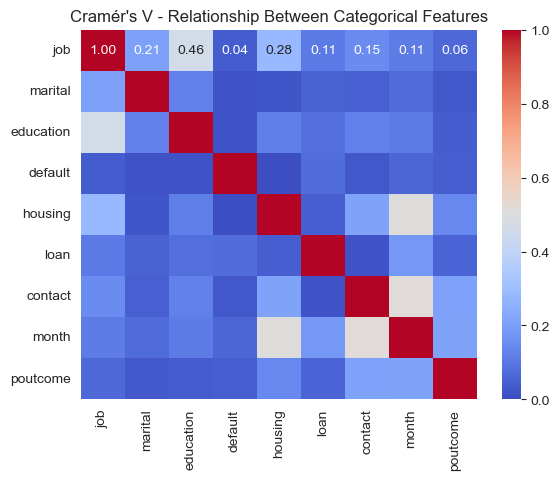

In [20]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2_stat, p_value, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Sum of all values in the contingency table
    return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize an empty DataFrame with the same features as both rows and columns
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))),
                                index=categorical_features, columns=categorical_features)

# Fill in the matrix with Cramér's V values
for feature_1 in categorical_features:
    for feature_2 in categorical_features:
        if feature_1 != feature_2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[feature_1], df[feature_2])
            cramers_v_matrix.loc[feature_1, feature_2] = cramers_v(contingency_table)
        else:
            cramers_v_matrix.loc[feature_1, feature_2] = 1.0  # Cramér's V is 1 for the same feature

# Plotting the heatmap of Cramér's V values
plt.figure()
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".2f", cbar=True)
plt.title("Cramér's V - Relationship Between Categorical Features")
plt.show()

The correlation matrix for categorical variables reveals that some variables, such as job and education (0.46), and month and housing (0.50), show moderate relationships. However, most categorical variables show weak correlations with each other, suggesting limited interdependence between factors like marital status, loan, and default.

C:\Users\Senuli\AppData\Local\Temp\ipykernel_15992\1164481692.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


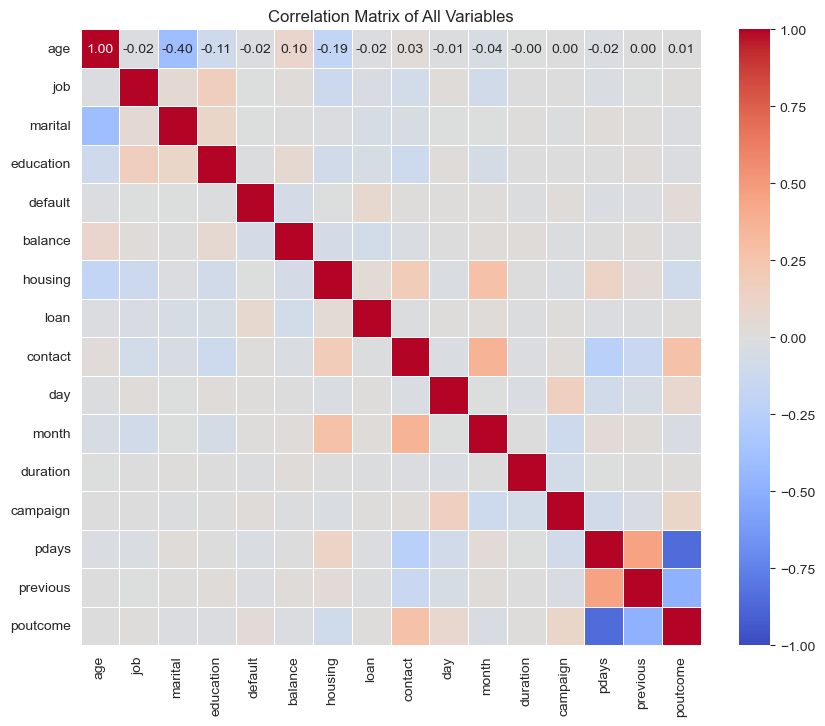

In [21]:
# Create a label encoder
label_encoder = LabelEncoder()

# Store the original labels in a dictionary
label_mappings = {}

# Encode categorical features to numeric (for correlation calculation)
for column in categorical_features:
    # Fit the label encoder to the column and get the original classes
    label_encoder.fit(df[column])
    
    # Store the original label mapping for the column
    label_mappings[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    
    # Apply label encoding to categorical columns
    df[column] = label_encoder.transform(df[column])

# Now, df has numeric values for categorical features
# Calculate the correlation matrix for all variables
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of All Variables")
plt.show()

# Reverse label encoding for all categorical columns
for column in categorical_features:
    df[column] = df[column].map({v: k for k, v in label_mappings[column].items()})

# Now, all categorical columns are restored to their original labels

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 6. Check for Duplicate Records

In [23]:
df.duplicated().sum()

0

### 7. Class Imbalance

Target Value Counts:
no     39922
yes     5289
Name: y, dtype: int64

Target Proportions (in %):
no     88.30152
yes    11.69848
Name: y, dtype: float64


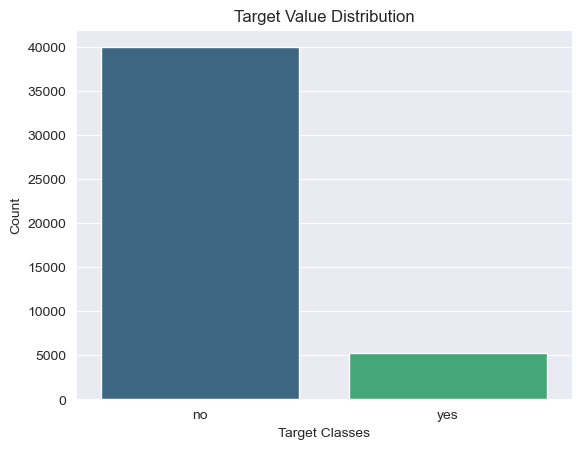

In [24]:
# Check the distribution of target values
target_counts = df['y'].value_counts()
target_proportions = df['y'].value_counts(normalize=True) * 100

# Display results
print("Target Value Counts:")
print(target_counts)
print("\nTarget Proportions (in %):")
print(target_proportions)

# Plotting the distribution
plt.figure()
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Target Value Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

Observations:
- The dataset is highly imbalanced, with the majority class (no) making up 88.30% of the data, while the minority class (yes) comprises only 11.70%.
- The imbalance indicates that the dataset may pose challenges for classification algorithms, as the model could become biased toward predicting the majority class.

### 8. Relationship between the Features and the Target Variable

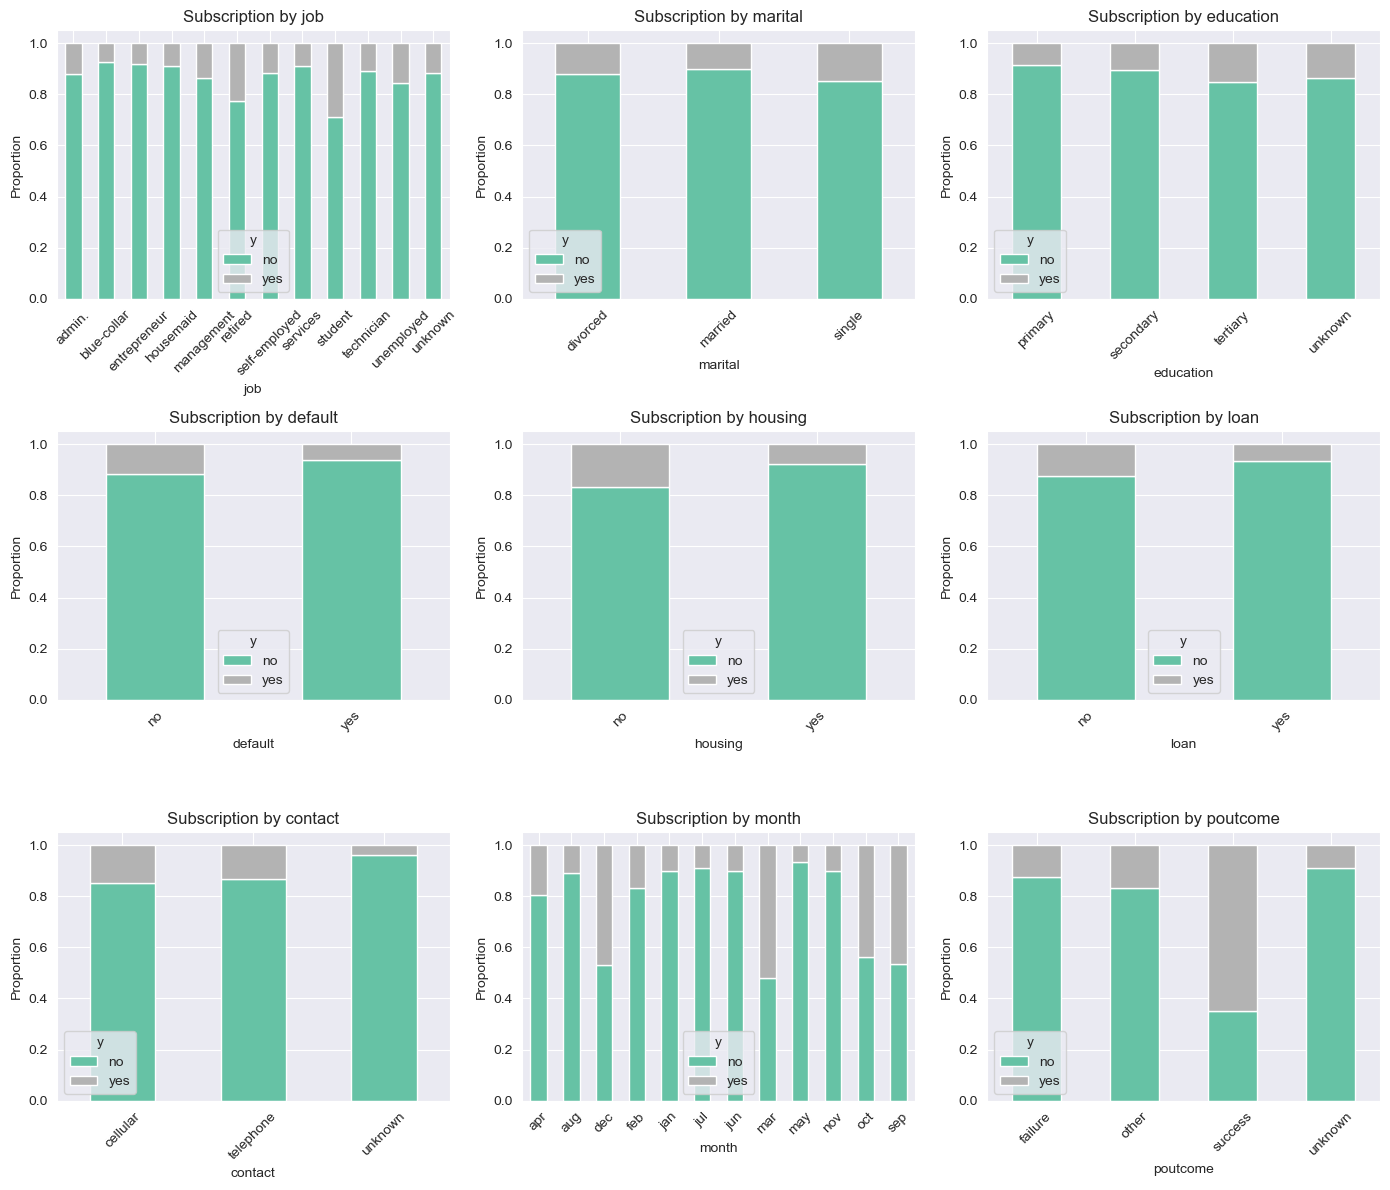

In [25]:
# Categorical Features

# Create subplots: 3 rows, 3 columns for 8 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size based on 8 subplots
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each column in a subplot
for i, col in enumerate(categorical_features):
    # Create a crosstab to get the count of target (y) for each category
    cross_tab = pd.crosstab(df[col], df['y'], normalize='index')
    
    # Plot stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2' )
    
    axes[i].set_title(f"Subscription by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

General Insights:
- Subscription Trends: Job, education, housing, and loan status significantly impact whether a client subscribes to a term deposit. People with managerial roles or those in the blue-collar category seem to have higher subscription rates. Clients with tertiary education also have a higher subscription rate compared to others.
- Feature Relevance: Some features like contact and month show a clear relationship with subscription, while others like default and poutcome have more mixed or lower impact on subscription.
- Potential Issues: Features like unknown could cause issues if not handled properly, as they have a significant number of entries.


Target Skewness: For most features, there is a heavy skew towards the no class for subscription, meaning non-subscribing clients dominate the dataset.


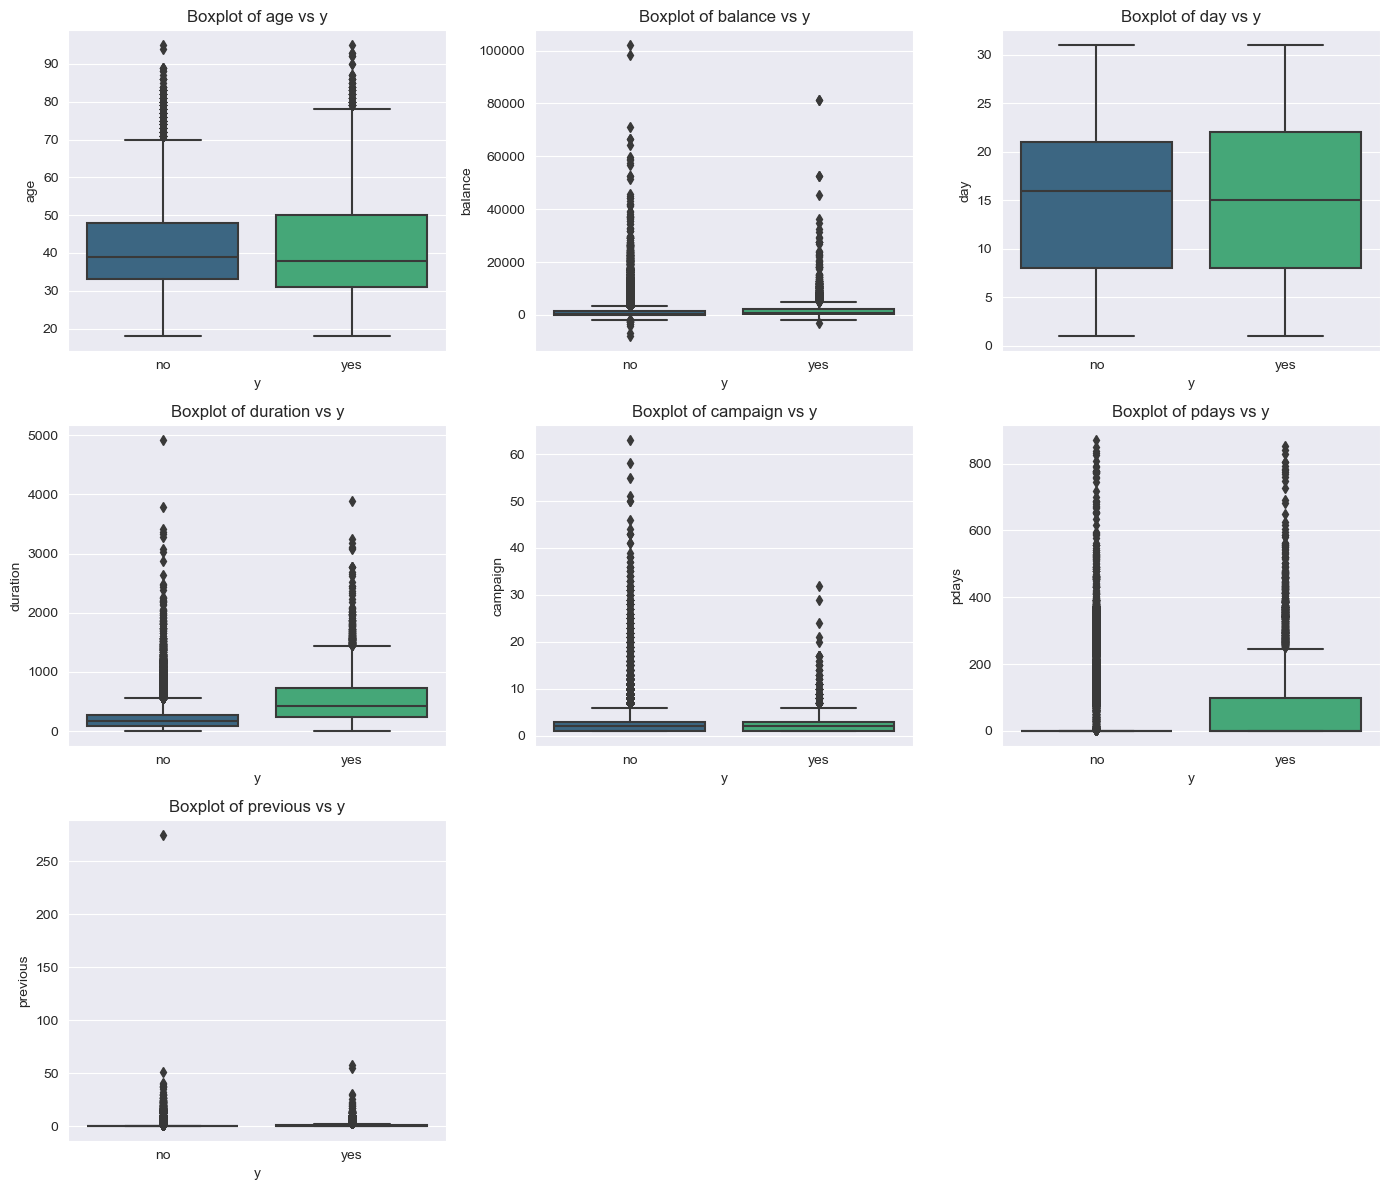

In [26]:
# Numerical Features

# Create subplots: 3 rows and 3 columns for 7 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))  # Adjust grid size
axes = axes.flatten()  # Flatten the axes array to iterate easily

# Plot each continuous column in a subplot
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='y', y=col, ax=axes[i], palette="viridis")  # Boxplot of feature vs label
    axes[i].set_title(f"Boxplot of {col} vs y")
    axes[i].set_xlabel('y')
    axes[i].set_ylabel(col)

# Turn off unused axes (if any)
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

### 9. Correlation between Features and the Target Variable

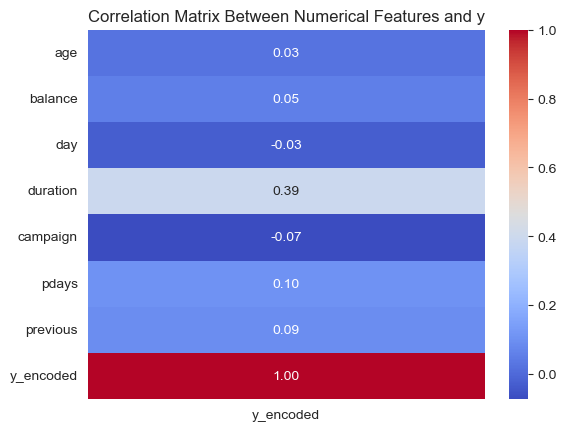

In [27]:
# Encode the target variable temporarily for correlation calculation
y_encoded = df['y'].map({'yes': 1, 'no': 0})

# Append the encoded target to the numerical features for a combined correlation matrix
numerical_features_with_target = df[numerical_features].copy()
numerical_features_with_target['y_encoded'] = y_encoded

# Calculate the correlation matrix
correlation_matrix = numerical_features_with_target.corr()

# Plot the heatmap
sns.heatmap(
    correlation_matrix[['y_encoded']], 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    cbar=True
)
plt.title("Correlation Matrix Between Numerical Features and y")
plt.show()

- The correlation analysis of numerical features with the target variable (`y`) shows that most features have low correlation values, with most falling below 0.15. 
- Notably, **`duration`** has the highest correlation at 0.39, indicating a moderate positive relationship with the target. 
- In contrast, **`day`** and **`campaign`** exhibit weak negative correlations of **-0.03** and **-0.07**, respectively, suggesting little to no influence on the likelihood of subscription. 
- These results suggest that the features related to time and campaign have minimal impact on predicting customer subscriptions.

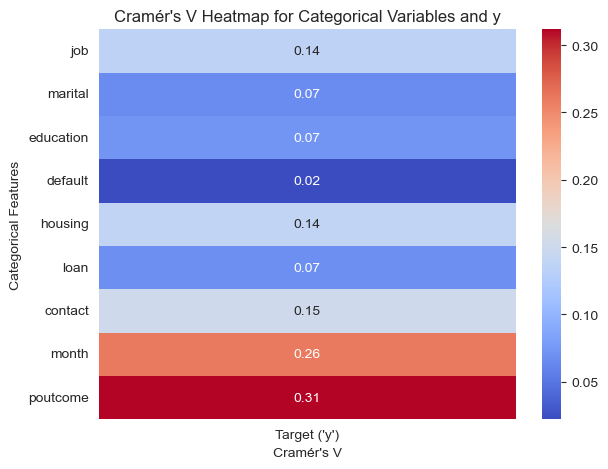

In [28]:
# Categorical Features

# Cramér's V calculation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if chi2_stat > 0 else 0

# Initialize a dictionary to store Cramér's V values for each feature
cramers_v_values = {}

for col in categorical_features:
    crosstab = pd.crosstab(df[col], df['y'])
    if not crosstab.empty:
        cramers_v_values[col] = cramers_v(df[col], df['y'])
    else:
        cramers_v_values[col] = 0  # Assign 0 if there are no valid combinations

# Convert the dictionary to a DataFrame for easy plotting
cramers_v_df = pd.DataFrame(cramers_v_values, index=["Target ('y')"])
cramers_v_df = cramers_v_df.T  # Transpose to have features as rows

# Plotting the heatmap
plt.figure()
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Cramér's V Heatmap for Categorical Variables and y")
plt.xlabel("Cramér's V")
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()

The **Cramér's V values** indicate the strength of association between each feature and the target (`y`):  

Cramér's V ranges from 0 to 1, where:
- Close to 0: Weak association.
- Close to 1: Strong association.

1. **`poutcome` (0.311)** and **`month` (0.260)** show the strongest associations, making them important for predicting subscriptions.  
2. **`contact` (0.151)** and **`housing` (0.139)** have weak but notable associations.  
3. Features like **`default` (0.022)** and **`marital` (0.065)** show very weak associations and may have limited impact.  


## Feature Engineering

- Handle Unknown Values
- Handle Outliers
- Feature Selection
- Categorical Encoding
- Handle class Imbalance
- Feature Scaling



In [29]:
df1 = df.copy()
df1.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


#### 1. Handle Unknown Values

In [30]:
# Count 'unknown' values in each column
unknown_counts = df1.apply(lambda x: (x == 'unknown').sum())

# Calculate the percentage of 'unknown' values in each column
unknown_percentage = (unknown_counts / len(df)) * 100

# Filter columns with 'unknown' values
unknown_columns = unknown_counts[unknown_counts > 0]

# Combine counts and percentages into a DataFrame
unknown_summary = pd.DataFrame({
    'Count': unknown_columns,
    'Percentage': unknown_percentage[unknown_counts > 0]
})

# Display the summary
unknown_summary

,Count,Percentage
job,288,0.637013
education,1857,4.107407
contact,13020,28.798301
poutcome,36959,81.747805


Though `poutcome` has around 81% of `unknown` values, it has a correlation of 0.31 with the target variable, which is the highest among all, It should not be dropped.

In [31]:
# Group by 'contact' and 'y', get the count, and then calculate percentages
contact_y_counts = df1.groupby(['contact', 'y']).size().reset_index(name='Count')

# Calculate percentage for each group
total_count = df1.shape[0]
contact_y_counts['Percentage'] = (contact_y_counts['Count'] / total_count) * 100

# Display the result
contact_y_counts

,contact,y,Count,Percentage
0,cellular,no,24916,55.110482
1,cellular,yes,4369,9.663577
2,telephone,no,2516,5.565017
3,telephone,yes,390,0.862622
4,unknown,no,12490,27.626020
5,unknown,yes,530,1.172281


- "unknown" category introduces too much noise.
- "telephone" doesn't provide sufficient information. 
- Method of contact does not seem to have an effect on y variable (subscription to a term deposit) when looked into the meaning.

- Contact has a correlation of 0.15 with y  

Since the contact column has some correlation with y, it's not a good idea to drop it entirely.

#### 2. Handle Outliers 

In [32]:
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

- Since all the values in `age` lie between 18 and 95 which is an acceptable range, that feature can be kept as it is.
- `day` has no outliers

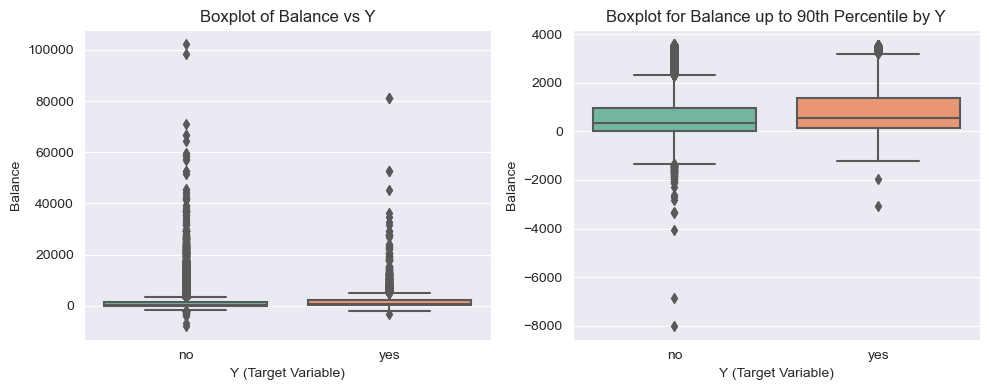

In [33]:
# Create the figure and specify the subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First boxplot: Balance vs Y
sns.boxplot(x='y', y='balance', data=df1, palette='Set2', ax=axes[0])
axes[0].set_title('Boxplot of Balance vs Y')
axes[0].set_xlabel('Y (Target Variable)')
axes[0].set_ylabel('Balance')

# Calculate the 90th percentile for balance
percentile_90 = np.percentile(df['balance'].dropna(), 90)

# Filter the data to include only values up to the 90th percentile
filtered_data = df[df['balance'] <= percentile_90]

# Second boxplot: Balance (up to the 90th percentile) vs Y
sns.boxplot(x='y', y='balance', data=filtered_data, palette='Set2', ax=axes[1])
axes[1].set_title('Boxplot for Balance up to 90th Percentile by Y')
axes[1].set_xlabel('Y (Target Variable)')
axes[1].set_ylabel('Balance')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

The outliers in the above 1st subplot are some extreme cases. 
- The outliers above the upper bound could be due to specific business practices or errors in data entry.
- The negative values (less than lower bound) could be due to monetary values and negative balances.

**When we look at the magnified plot (on the right) it can be seen that there is notable difference between the ranges of yes and no of the term subscription of the majority.**

**The majority of people who are subscribed (`yes`) are in a range higher than the others (`no`)**

Considering that majority of data has an effect on the target variable based on high balances, The extreme outliers can lead to overfitting or mis-classifications.

In [34]:
# Calculate the IQR for the 'balance' feature
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers and display the entire row
outliers = df1[(df1['balance'] < lower_bound) | (df1['balance'] > upper_bound)]

# Sort
outliers = outliers.sort_values(by='balance', ascending=False)

# Display the whole row for outliers
outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [35]:
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


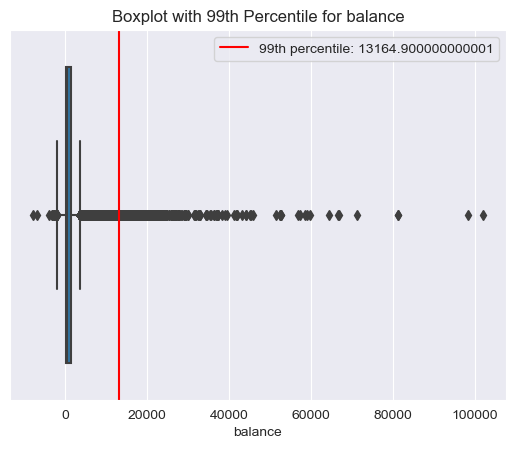

In [36]:
column_name = 'balance'

# Calculate the 90th percentile
percentile_99_9 = np.percentile(df[column_name].dropna(), 99)

# Create the boxplot
plt.figure()
sns.boxplot(x=df1[column_name])

# Add a line for the 90th percentile
plt.axvline(percentile_99_9, color='red', label=f'99th percentile: {percentile_99_9}')

# Add labels and title
plt.title(f'Boxplot with 99th Percentile for {column_name}')
plt.xlabel(column_name)
plt.legend()

# Show the plot
plt.show()


**Threshold for Capping:**

I decided to set a cap for the `balance` feature at 50,000, as values above this threshold are considered extreme and likely do not represent typical cases in the dataset. 
- Capping these values helps to reduce the influence of outliers, ensuring that the model is not overly sensitive to rare cases and preventing potential bias. 
- This approach retains all data points while limiting the impact of extreme values on model accuracy and interpretability.


In [37]:
# Set a cap for the 'balance' feature at 50,000
cap_value = 50000
df1['balance'] = df1['balance'].apply(lambda x: min(x, cap_value))

# Check the result to ensure capping was applied correctly
print(df1['balance'].describe())

count    45211.000000
mean      1355.970781
std       2909.887431
min      -8019.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max      50000.000000
Name: balance, dtype: float64


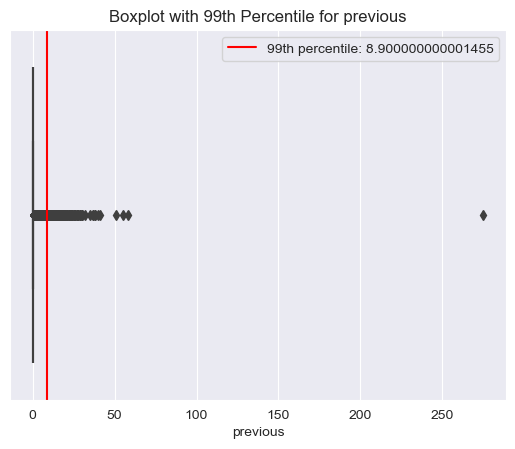

In [38]:
# previous

column_name = 'previous'

# Calculate the 90th percentile
percentile_99_9 = np.percentile(df[column_name].dropna(), 99)

# Create the boxplot
plt.figure()
sns.boxplot(x=df1[column_name])

# Add a line for the 90th percentile
plt.axvline(percentile_99_9, color='red', label=f'99th percentile: {percentile_99_9}')

# Add labels and title
plt.title(f'Boxplot with 99th Percentile for {column_name}')
plt.xlabel(column_name)
plt.legend()

# Show the plot
plt.show()


In [39]:
df1[column_name].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [40]:
df1[df1[column_name] == 275]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


The maximum value of the `previous` seems to be an error. When the whole sample is observed, none of the other features are extreme outliers or unknown values. So that specific sample can be dropped to avoid any misclassificaitons

In [41]:
# Drop rows where the column has the value 275
df1 = df1[df1[column_name] != 275]

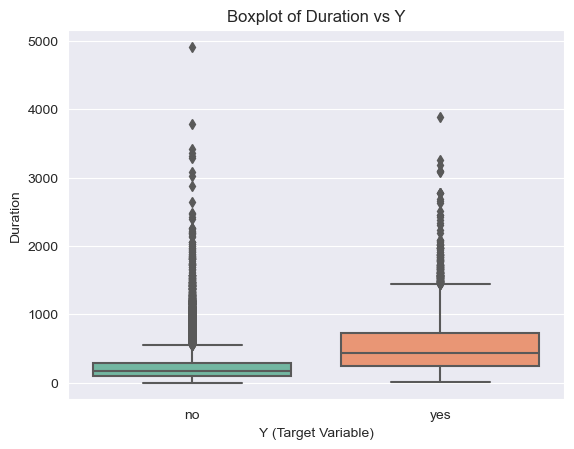

In [42]:
# duration

# Create the boxplot
plt.figure()
sns.boxplot(x='y', y='duration', data=df1, palette='Set2')

# Add labels and title
plt.title('Boxplot of Duration vs Y')
plt.xlabel('Y (Target Variable)')
plt.ylabel('Duration')

# Show the plot
plt.show()

In the `duration` column, there are outliers that could potentially affect the model's accuracy. These outliers can distort the relationship between the duration of the last contact and the target variable (`y`). 

- When analyzing the majority of 'yes' and 'no' values with respect to `duration`, we observe that longer durations tend to indicate a higher interest in subscribing (i.e., 'yes'). 
- However, the presence of extreme outliers with high duration values on the 'no' side could mislead the model, suggesting that longer durations correspond to less interest in the subscription, which is not accurate.

This issue arises because the extreme outliers represent only a very small portion of the data. 

To prevent these outliers from causing mis-classifications, we can cap the extreme values at a certain threshold (e.g., 99.9th percentile). Capping allows us to retain more data, avoiding the loss of valuable information that might occur if we remove outliers entirely, which could affect the model's performance.


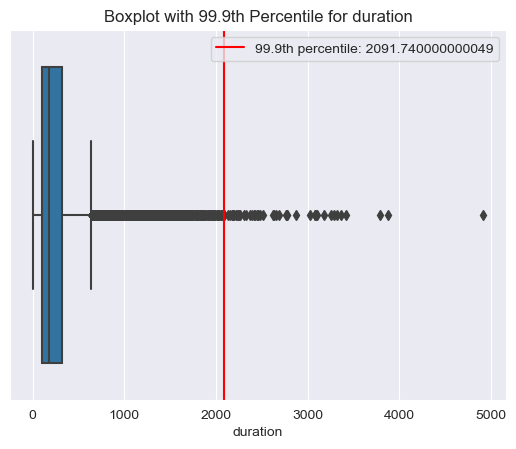

In [43]:
column_name = 'duration'

# Calculate the 90th percentile
percentile_99_9 = np.percentile(df[column_name].dropna(), 99.9)

# Create the boxplot
plt.figure()
sns.boxplot(x=df1[column_name])

# Add a line for the 90th percentile
plt.axvline(percentile_99_9, color='red', label=f'99.9th percentile: {percentile_99_9}')

# Add labels and title
plt.title(f'Boxplot with 99.9th Percentile for {column_name}')
plt.xlabel(column_name)
plt.legend()

# Show the plot
plt.show()


In [44]:
# Cap the values above the 99.9th percentile
df1.loc[df1[column_name] > percentile_99_9, column_name] = percentile_99_9

# Verify the changes
print(f"Values capped at the 99.9th percentile ({percentile_99_9}).")
print(df1[column_name].describe())

Values capped at the 99.9th percentile (2091.740000000049).
count    45210.000000
mean       257.530990
std        251.583605
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       2091.740000
Name: duration, dtype: float64


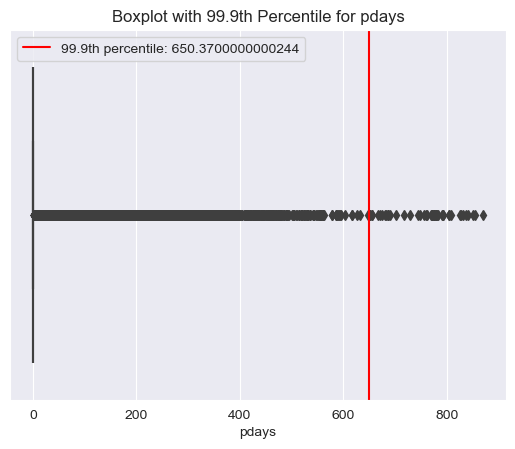

In [45]:
# pdays

column_name = 'pdays'

# Calculate the 90th percentile
percentile_99_9 = np.percentile(df[column_name].dropna(), 99.9)

# Create the boxplot
plt.figure()
sns.boxplot(x=df1[column_name])

# Add a line for the 90th percentile
plt.axvline(percentile_99_9, color='red', label=f'99.9th percentile: {percentile_99_9}')

# Add labels and title
plt.title(f'Boxplot with 99.9th Percentile for {column_name}')
plt.xlabel(column_name)
plt.legend()

# Show the plot
plt.show()


Considering the meaning of the `pdays`
- number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

It can be possible that some customers have been contacted a long time ago, or very recently, or not contacted before. So `pays` can be kept as it is.

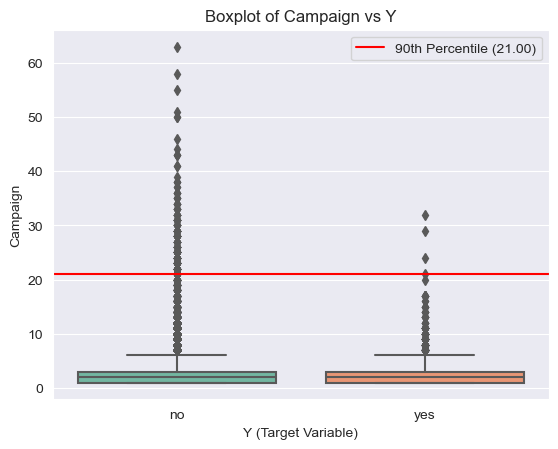

In [46]:
# Calculate the 90th percentile of the 'campaign' column
percentile_90 = df1['campaign'].quantile(0.995)

# Create the boxplot
plt.figure()
sns.boxplot(x='y', y='campaign', data=df1, palette='Set2')

# Add a horizontal line at the 90th percentile
plt.axhline(y=percentile_90, color='r', label=f'90th Percentile ({percentile_90:.2f})')

# Add labels and title
plt.title('Boxplot of Campaign vs Y')
plt.xlabel('Y (Target Variable)')
plt.ylabel('Campaign')

# Add a legend
plt.legend()

# Show the plot
plt.show()

The `campaign` variable shows that the majority of individuals with both target values (`yes` and `no`) fall within a similar range of `campaign` values. Additionally, we can assume that individuals who have been contacted more frequently may have other factors influencing their responses.

The observed correlation between `campaign` and the target variable `y` is -0.07. This weak negative correlation could be due to the high imbalance in the target class and the presence of outliers within the `campaign` data.

To address this issue, I have decided to cap values above a certain threshold to reduce the impact of extreme outliers. In this case, I have chosen to set the threshold at the 99.5th percentile of the `campaign` variable.

The threshold was set at the 99.5th percentile because it effectively captures the vast majority of the data while excluding extreme outliers that may not represent typical cases. 

In [47]:
# Calculate the 99.5th percentile for the 'campaign' variable
threshold = df1['campaign'].quantile(0.995)

# Cap the 'campaign' variable at the threshold
df1['campaign_capped'] = np.where(df1['campaign'] > threshold, threshold, df1['campaign'])

In [48]:
# Calculate the correlation between 'campaign_capped' and 'y'
correlation = df1['campaign_capped'].corr(df1['y'].apply(lambda x: 1 if x == 'yes' else 0))

# Display the correlation
print(f"Correlation between 'campaign_capped' and 'y': {correlation:.4f}")

Correlation between 'campaign_capped' and 'y': -0.0769


In [49]:
# Update the 'campaign' column in df1 with the values from 'campaign_capped'
df1['campaign'] = df1['campaign_capped']

# Drop the 'campaign_capped' column as it's no longer needed
df1.drop(columns=['campaign_capped'], inplace=True)

df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Validation of related columns
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Considering these rows some validations should be done to see if they perfectly align with each other, since they are related.

In [50]:
# Check 1: If 'previous' == 0, then 'pdays' should be -1
invalid_rows_1 = df1[(df1['previous'] == 0) & (df1['pdays'] != -1)]
print(f"Invalid rows where 'previous' is 0 but 'pdays' is not -1: {invalid_rows_1.shape[0]}")

# Check 2: If 'pdays' == -1, then 'previous' should be 0
invalid_rows_2 = df1[(df1['pdays'] == -1) & (df1['previous'] != 0)]
print(f"Invalid rows where 'pdays' is -1 but 'previous' is not 0: {invalid_rows_2.shape[0]}")

# Check 3: If 'previous' > 0, then 'pdays' should not be -1
invalid_rows_3 = df1[(df1['previous'] > 0) & (df1['pdays'] == -1)]
print(f"Invalid rows where 'previous' > 0 but 'pdays' is -1: {invalid_rows_3.shape[0]}")

# Check 4: If 'poutcome' == "failure", then 'previous' > 0
invalid_rows_4 = df1[(df1['poutcome'] == "failure") & (df1['previous'] <= 0)]
print(f"Invalid rows where 'poutcome' is 'failure' but 'previous' is not > 0: {invalid_rows_4.shape[0]}")

# Check 5: If 'poutcome' == "success", then 'previous' > 0
invalid_rows_5 = df1[(df1['poutcome'] == "success") & (df1['previous'] <= 0)]
print(f"Invalid rows where 'poutcome' is 'success' but 'previous' is not > 0: {invalid_rows_5.shape[0]}")

# Check 6: If 'poutcome' == "unknown", then 'previous' should be 0
invalid_rows_6 = df1[(df1['poutcome'] == "unknown") & (df1['previous'] != 0)]
print(f"Invalid rows where 'poutcome' is 'unknown' but 'previous' is not 0: {invalid_rows_6.shape[0]}")

# Check 7: If 'pdays' == -1, then 'contact' should be 'unknown'
invalid_rows_7 = df1[(df1['pdays'] == -1) & (df1['contact'] != 'unknown')]
print(f"Invalid rows where 'pdays' is -1 but 'contact' is not 'unknown': {invalid_rows_7.shape[0]}")

# Check 8: If 'poutcome' == "other", then 'previous' should be > 0
invalid_rows_8 = df1[(df1['poutcome'] == "other") & (df1['previous'] <= 0)]
print(f"Invalid rows where 'poutcome' is 'other' but 'previous' is not > 0: {invalid_rows_8.shape[0]}")

Invalid rows where 'previous' is 0 but 'pdays' is not -1: 0
Invalid rows where 'pdays' is -1 but 'previous' is not 0: 0
Invalid rows where 'previous' > 0 but 'pdays' is -1: 0
Invalid rows where 'poutcome' is 'failure' but 'previous' is not > 0: 0
Invalid rows where 'poutcome' is 'success' but 'previous' is not > 0: 0
Invalid rows where 'poutcome' is 'unknown' but 'previous' is not 0: 5
Invalid rows where 'pdays' is -1 but 'contact' is not 'unknown': 24004
Invalid rows where 'poutcome' is 'other' but 'previous' is not > 0: 0


We can assume that the `contact` method is provided to the bank during the registration process. This explains why there are numerous instances where clients have a contact method recorded, even though they have not been contacted in previous campaigns.

There are 5 instances where the `poutcome` is recorded as 'unknown', but the `previous` value is not 0. These discrepancies could indicate errors in the data, and we should correct these values accordingly.

In [51]:
# Identify rows where poutcome is 'unknown' but previous is not 0
invalid_poutcome_previous = df[(df['poutcome'] == 'unknown') & (df['previous'] != 0)]

# Print the number of invalid rows
print(f"Number of invalid rows where 'poutcome' is 'unknown' but 'previous' is not 0: {invalid_poutcome_previous.shape[0]}")

# Correct these rows by setting 'previous' to 0 when 'poutcome' is 'unknown'
df.loc[(df['poutcome'] == 'unknown') & (df['previous'] != 0), 'previous'] = 0

# Verify the change
invalid_poutcome_previous_fixed = df[(df['poutcome'] == 'unknown') & (df['previous'] != 0)]
print(f"Number of invalid rows after correction: {invalid_poutcome_previous_fixed.shape[0]}")

Number of invalid rows where 'poutcome' is 'unknown' but 'previous' is not 0: 5
Number of invalid rows after correction: 0


#### Feature Selection

- During the EDA, it was found that `default` is highly imbalaced, and has only 1.8% in one value. 
- Additionally, it has a very low correlation with the target variable (0.02) 
- Due to those factors, this can be considered a not so important variable. It can be dropped to increase accuracy.

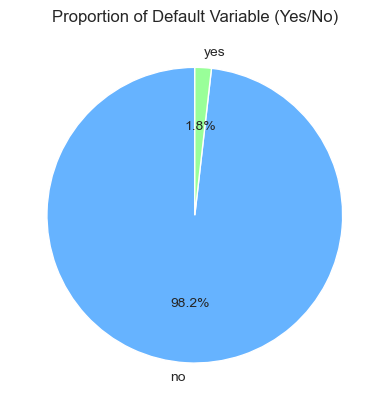

In [52]:
# default

# Plot a pie chart for the 'default' variable
plt.figure()
df['default'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)

# Display the plot
plt.title('Proportion of Default Variable (Yes/No)')
plt.ylabel('')
plt.show()

In [53]:
# Drop the 'default' column from df1 in place
df1.drop(columns=['default'], inplace=True)

#### Categorical Encoding

In [54]:
df2 = df1.copy()
df2.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [55]:
# Select categorical features from df2
categorical_features = df2.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

- education and month should be label-encoded (they are in an order)
- housing and loan should also be label-encoded (they are yes no)
- job,  marital, contact and poutcome should be one-hot-encoded

In [56]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define the order for 'education' and 'month'
education_order = ['primary', 'secondary', 'tertiary', 'unknown']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Manually create a mapping for 'education' and 'month' using the order
education_mapping = {value: index for index, value in enumerate(education_order)}
month_mapping = {value: index for index, value in enumerate(month_order)}

# Label encode 'education' using the defined mapping
df2['education'] = df2['education'].map(education_mapping)

# Label encode 'month' using the defined mapping
df2['month'] = df2['month'].map(month_mapping)

# Label encode 'housing' (yes/no)
df2['housing'] = label_encoder.fit_transform(df2['housing'])

# Label encode 'loan' (yes/no)
df2['loan'] = label_encoder.fit_transform(df2['loan'])

# Display the resulting DataFrame after encoding
print("After Label Encoding:")
print(df2[['education', 'month', 'housing', 'loan']].head())

After Label Encoding:
   education  month  housing  loan
0          2      4        1     0
1          1      4        1     0
2          1      4        1     1
3          3      4        1     0
4          3      4        0     0


In [57]:
# One-hot encode 'job' column
job_encoded = pd.get_dummies(df2['job'], prefix='job')

# Concatenate the one-hot encoded columns with the original DataFrame
df2 = pd.concat([df2, job_encoded], axis=1)

# Drop the original 'job' column as it's now one-hot encoded
df2 = df2.drop('job', axis=1)

# Display the resulting DataFrame after one-hot encoding for 'job'
print("After One-Hot Encoding for 'job':")

After One-Hot Encoding for 'job':


In [58]:
df2.head()

,age,marital,education,balance,housing,loan,contact,day,month,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,2,2143,1,0,unknown,5,4,261.0,...,0,0,1,0,0,0,0,0,0,0
1,44,single,1,29,1,0,unknown,5,4,151.0,...,0,0,0,0,0,0,0,1,0,0
2,33,married,1,2,1,1,unknown,5,4,76.0,...,1,0,0,0,0,0,0,0,0,0
3,47,married,3,1506,1,0,unknown,5,4,92.0,...,0,0,0,0,0,0,0,0,0,0
4,33,single,3,1,0,0,unknown,5,4,198.0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# One-hot encode 'marital' column
marital_encoded = pd.get_dummies(df2['marital'], prefix='marital')

# One-hot encode 'contact' column
contact_encoded = pd.get_dummies(df2['contact'], prefix='contact')

# One-hot encode 'poutcome' column
poutcome_encoded = pd.get_dummies(df2['poutcome'], prefix='poutcome')

# Concatenate the one-hot encoded columns with the original DataFrame
df2 = pd.concat([df2, marital_encoded, contact_encoded, poutcome_encoded], axis=1)

# Drop the original 'marital', 'contact', and 'poutcome' columns as they are now one-hot encoded
df2 = df2.drop(['marital', 'contact', 'poutcome'], axis=1)

# Display the resulting DataFrame after one-hot encoding for 'marital', 'contact', and 'poutcome'
print("After One-Hot Encoding for 'marital', 'contact', and 'poutcome':")

After One-Hot Encoding for 'marital', 'contact', and 'poutcome':


In [60]:
df2.head()

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,1,0,5,4,261.0,1.0,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,1,29,1,0,5,4,151.0,1.0,-1,...,0,0,1,0,0,1,0,0,0,1
2,33,1,2,1,1,5,4,76.0,1.0,-1,...,0,1,0,0,0,1,0,0,0,1
3,47,3,1506,1,0,5,4,92.0,1.0,-1,...,0,1,0,0,0,1,0,0,0,1
4,33,3,1,0,0,5,4,198.0,1.0,-1,...,0,0,1,0,0,1,0,0,0,1


In [63]:
print(df2.dtypes)

age                    int64
education              int64
balance                int64
housing                int32
loan                   int32
day                    int64
month                  int64
duration             float64
campaign             float64
pdays                  int64
previous               int64
y                     object
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
dtype: object
